We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np

We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
#Assuming en is the name of your csv file (English)
english=pd.read_csv('en.csv')
english.head()

,"new jersey is sometimes quiet during autumn , and it is snowy in april ."
0,the united states is usually chilly during jul...
1,"california is usually quiet during march , and..."
2,the united states is sometimes mild during jun...
3,"your least liked fruit is the grape , but my l..."
4,"his favorite fruit is the orange , but my favo..."


In [ ]:
#Assuming en is the name of your csv file  (French)
french=pd.read_csv('fr.csv')
french.head()

,"new jersey est parfois calme pendant l' automne , et il est neigeux en avril ."
0,les états-unis est généralement froid en juill...
1,"california est généralement calme en mars , et..."
2,"les états-unis est parfois légère en juin , et..."
3,"votre moins aimé fruit est le raisin , mais mo..."
4,"son fruit préféré est l'orange , mais mon préf..."


**How many sentences does each of the files contain?**

In [ ]:
print('English file contains',english.shape[0],'sentences')
print('French file contains',french.shape[0],'sentences')

English file contains 137859 sentences
French file contains 137859 sentences


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
# Concatenate the dataframes into one
df = pd.concat([english, french], axis=1)

# Display the first few rows of the combined dataframe
print('Combined dataframe (df) with English and French sentences:')
print(df.head())


Combined dataframe (df) with English and French sentences:
  new jersey is sometimes quiet during autumn , and it is snowy in april .  \
0  the united states is usually chilly during jul...                         
1  california is usually quiet during march , and...                         
2  the united states is sometimes mild during jun...                         
3  your least liked fruit is the grape , but my l...                         
4  his favorite fruit is the orange , but my favo...                         

  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .  
0  les états-unis est généralement froid en juill...                              
1  california est généralement calme en mars , et...                              
2  les états-unis est parfois légère en juin , et...                              
3  votre moins aimé fruit est le raisin , mais mo...                              
4  son fruit préféré est l'orange , mais mon préf...     

Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
df.columns = ['English', 'French']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137859 entries, 0 to 137858
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  137859 non-null  object
 1   French   137859 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


Pick a sentence and print it in both languages

In [ ]:
# Get the English and French sentences at the random index
english_sentence = df.loc[10000, 'English']
french_sentence = df.loc[10000, 'French']

# Print the sentences
print("English Sentence:", english_sentence)
print("French Sentence:", french_sentence)


English Sentence: she dislikes grapes , strawberries , and pears .
French Sentence: elle déteste les raisins , les fraises et les poires .


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
import re
# Function to remove punctuation from a sentence
def remove_punctuation(text):
    # Use regular expression to remove all punctuation
    return re.sub(r'[^\w\s]', '', text)

# Apply the remove_punctuation function to both columns
df['English'] = df['English'].apply(remove_punctuation)
df['French'] = df['French'].apply(remove_punctuation)



Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
english_sentence_without_punctuation = df.loc[10000, 'English']
french_sentence_without_punctuation = df.loc[10000, 'French']
print("English Sentence selected previously after cleaning:", english_sentence_without_punctuation)
print("French Sentence selected previously after cleaning", french_sentence_without_punctuation)


English Sentence selected previously after cleaning: she dislikes grapes  strawberries  and pears 
French Sentence selected previously after cleaning elle déteste les raisins  les fraises et les poires 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
# Function to count words
def process_text(text):
    # Split the text into words and count them
    words = text.split()
    return len(words)

In [ ]:
# Apply the process_text function to both columns to calculate word counts
df['ENG Length'] = df['English'].apply(process_text)
df['FR Length'] = df['French'].apply(process_text)

Visualize the distribution of the lengths of english sentences and french sentences.

Text(0, 0.5, 'Frequency')

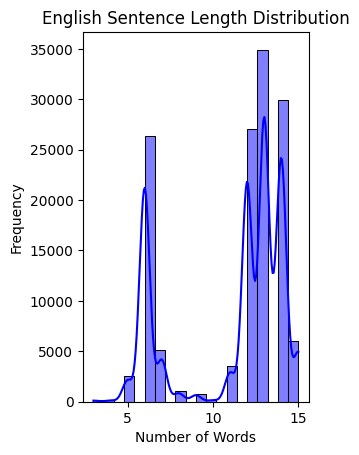

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
sns.histplot(df['ENG Length'], bins=20, kde=True, color='blue')
plt.title('English Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

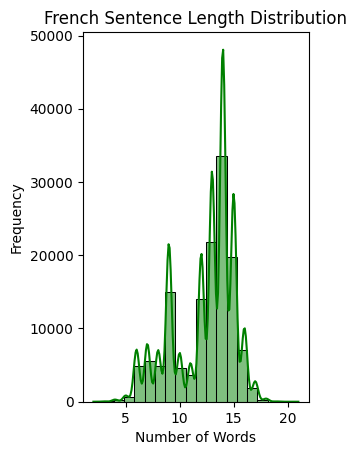

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(df['FR Length'], bins=20, kde=True, color='green')
plt.title('French Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [ ]:
# Find the maximum length of an English sentence
max_eng_length = df['ENG Length'].max()

# Find the maximum length of a French sentence
max_fr_length = df['FR Length'].max()

print('Maximum Length of an English Sentence:', max_eng_length)
print('Maximum Length of a French Sentence:', max_fr_length)


Maximum Length of an English Sentence: 15
Maximum Length of a French Sentence: 21


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

Tokenize the sentences that we have.

In [ ]:
import nltk
# download Punkt Sentence Tokenizer
nltk.download('punkt')
# Initialize the English tokenizer
english_tokenizer = nltk.word_tokenize

# Initialize the French tokenizer
french_tokenizer = nltk.word_tokenize  # You can use the same tokenizer for both languages

# Tokenize the words in the 'English Sentence' column
df['English Tokens'] = df['English'].apply(english_tokenizer)

# Tokenize the words in the 'French Sentence' column
df['French Tokens'] = df['French'].apply(french_tokenizer)


# Display the first few rows of the dataframe with tokenized words
print('Dataframe (df) with tokenized words:')
print(df[['English Tokens', 'French Tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Dataframe (df) with tokenized words:
                                      English Tokens  \
0  [the, united, states, is, usually, chilly, dur...   
1  [california, is, usually, quiet, during, march...   
2  [the, united, states, is, sometimes, mild, dur...   
3  [your, least, liked, fruit, is, the, grape, bu...   
4  [his, favorite, fruit, is, the, orange, but, m...   

                                       French Tokens  
0  [les, étatsunis, est, généralement, froid, en,...  
1  [california, est, généralement, calme, en, mar...  
2  [les, étatsunis, est, parfois, légère, en, jui...  
3  [votre, moins, aimé, fruit, est, le, raisin, m...  
4  [son, fruit, préféré, est, lorange, mais, mon,...  


**How many unique words do we have in english and in french?**

In [ ]:
# Collect all English tokens from the dataframe
english_tokens = df['English Tokens'].explode().tolist()

# Collect all French tokens from the dataframe
french_tokens = df['French Tokens'].explode().tolist()

# Calculate the number of unique words in English
unique_english_words = len(set(english_tokens))

# Calculate the number of unique words in French
unique_french_words = len(set(french_tokens))

print('Number of Unique English Words:', unique_english_words)
print('Number of Unique French Words:', unique_french_words)

Number of Unique English Words: 199
Number of Unique French Words: 345


####Padding

Perform padding on the sequences that we have.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Initialize Tokenizers
tokenizer_en = Tokenizer()
tokenizer_fr = Tokenizer()

# Fit Tokenizers on your English and French sentences
tokenizer_en.fit_on_texts(df['English Tokens'])
tokenizer_fr.fit_on_texts(df['French Tokens'])

# Convert text to sequences
sequences_en = tokenizer_en.texts_to_sequences(df['English Tokens'])
sequences_fr = tokenizer_fr.texts_to_sequences(df['French Tokens'])
# Determine the maximum sequence length
max_seq_length_en = max(len(seq) for seq in sequences_en)
max_seq_length_fr = max(len(seq) for seq in sequences_fr)

# Pad sequences to a fixed length (use the previously determined max_seq_length_en and max_seq_length_fr)
padded_sequences_en = pad_sequences(sequences_en, maxlen=max_seq_length_en, padding='post', truncating='post')
padded_sequences_fr = pad_sequences(sequences_fr, maxlen=max_seq_length_fr, padding='post', truncating='post')

# Replace the original columns with padded sequences
df['English Tokens'] = list(padded_sequences_en)
df['French Tokens'] = list(padded_sequences_fr)

# Display the first few rows of the dataframe with padded sequences
print('Dataframe (df) with padded sequences:')
print(df[['English Tokens', 'French Tokens']].head())


Dataframe (df) with padded sequences:
                                      English Tokens  \
0  [5, 20, 21, 1, 9, 62, 4, 43, 7, 3, 1, 9, 51, 2...   
1  [22, 1, 9, 67, 4, 38, 7, 3, 1, 9, 68, 2, 34, 0...   
2  [5, 20, 21, 1, 8, 64, 4, 34, 7, 3, 1, 57, 2, 4...   
3  [29, 12, 16, 13, 1, 5, 82, 6, 30, 12, 16, 1, 5...   
4  [31, 11, 13, 1, 5, 84, 6, 30, 11, 1, 5, 82, 0,...   

                                       French Tokens  
0  [4, 31, 1, 12, 19, 2, 48, 6, 3, 94, 68, 2, 50,...  
1  [100, 1, 12, 66, 2, 44, 6, 3, 1, 12, 21, 2, 40...  
2  [4, 31, 1, 8, 268, 2, 40, 6, 3, 102, 19, 2, 47...  
3  [39, 13, 14, 16, 1, 10, 81, 5, 38, 13, 14, 1, ...  
4  [20, 16, 17, 1, 83, 5, 38, 17, 1, 10, 81, 0, 0...  


In [ ]:
# Print padded sequences for a few examples
#sentence used before
print("Padded English Sequence:")
print(padded_sequences_en[10000])

print("Padded French Sequence:")
print(padded_sequences_fr[10000])

# Find the index of the maximum length for English sentences
max_eng_length = df['ENG Length'].max()
index_of_max_eng_length = df[df['ENG Length'] == max_eng_length].index[0]

# Find the index of the maximum length for French sentences
max_fr_length = df['FR Length'].max()
index_of_max_fr_length = df[df['FR Length'] == max_fr_length].index[0]

print('Index of Maximum Length English Sentence:', index_of_max_eng_length)
print('Index of Maximum Length French Sentence:', index_of_max_fr_length)
print(padded_sequences_en[index_of_max_eng_length])
print(padded_sequences_fr[index_of_max_fr_length])




Padded English Sequence:
[27 69 73 79  7 78  0  0  0  0  0  0  0  0  0]
Padded French Sequence:
[27 93  4 76  4 73  6  4 72  0  0  0  0  0  0  0  0  0  0  0  0]
Index of Maximum Length English Sentence: 0
Index of Maximum Length French Sentence: 94613
[ 5 20 21  1  9 62  4 43  7  3  1  9 51  2 45]
[ 34  33 104 102   9  19  15 110  22  11  24   6   3   1   9 225  22 226
  26  11  24]


##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, RepeatVector, TimeDistributed, Dense

vocab_size_en = len(tokenizer_en.word_index) + 1  # Add 1 for the padding token
vocab_size_fr = len(tokenizer_fr.word_index) + 1  # Add 1 for the padding token
embedding_dim = 300


# Define the input sequence length (max_seq_length_en) and output sequence length (max_seq_length_fr)
input_sequence_length = max_seq_length_en
output_sequence_length = max_seq_length_fr

# Create the Seq2Seq model
model = Sequential()

# Encoder
model.add(Embedding(input_dim=vocab_size_en, output_dim=embedding_dim, input_length=input_sequence_length))
model.add(LSTM(128))

# Decoder
model.add(RepeatVector(output_sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size_fr, activation='softmax')))


# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 300)           60000     
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 repeat_vector (RepeatVecto  (None, 21, 128)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 21, 128)           131584    
                                                                 
 time_distributed (TimeDist  (None, 21, 345)           44505     
 ributed)                                                        
                                                                 
Total params: 455737 (1.74 MB)
Trainable params: 455737 

Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences_en,padded_sequences_fr, test_size=0.3, random_state=42)

# One-hot encode the target labels
y_train_one_hot = to_categorical(y_train, num_classes=vocab_size_fr)
y_test_one_hot = to_categorical(y_test, num_classes=vocab_size_fr)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs for training
num_epochs = 5

# Train the model
history = model.fit(x_train,y_train_one_hot, batch_size=64, epochs=num_epochs, validation_data=(x_test, y_test_one_hot))


Epoch 1/5
1508/1508 [==============================] - 209s 136ms/step - loss: 1.7612 - accuracy: 0.5797 - val_loss: 1.1790 - val_accuracy: 0.6756
Epoch 2/5
1508/1508 [==============================] - 186s 123ms/step - loss: 0.9243 - accuracy: 0.7360 - val_loss: 0.7485 - val_accuracy: 0.7788
Epoch 3/5
1508/1508 [==============================] - 186s 123ms/step - loss: 0.6266 - accuracy: 0.8123 - val_loss: 0.5182 - val_accuracy: 0.8427
Epoch 4/5
1508/1508 [==============================] - 186s 123ms/step - loss: 0.4329 - accuracy: 0.8707 - val_loss: 0.3561 - val_accuracy: 0.8958
Epoch 5/5
1508/1508 [==============================] - 206s 137ms/step - loss: 0.2863 - accuracy: 0.9225 - val_loss: 0.2567 - val_accuracy: 0.9332


 Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:

def translate_sentence(input_sentence, model, tokenizer_en, max_seq_length_en, tokenizer_fr, max_seq_length_fr):
    # Tokenize the input sentence
    input_tokens = tokenizer_en.texts_to_sequences([input_sentence])[0]

    # Pad the tokenized input sequence
    padded_input = pad_sequences([input_tokens], maxlen=max_seq_length_en, padding='post',truncating='post')

    # Predict the output sequence using the model
    predicted_output = model.predict(np.array(padded_input))

    # Decode the predicted output sequence into a French sentence
    output_sentence = decode_output_sequence(predicted_output, tokenizer_fr)

    return output_sentence

def decode_output_sequence(output_sequence, tokenizer):
    # Get the index of the highest probability word at each position
    output_sequence = np.argmax(output_sequence, axis=-1)

    # Convert indices to words using the tokenizer
    output_sentence = tokenizer.sequences_to_texts(output_sequence)[0]

    return output_sentence


Test the following sentence

In [ ]:
input = "she is driving the truck"
translated_sentence = translate_sentence(input, model, tokenizer_en, max_seq_length_en, tokenizer_fr, max_seq_length_fr)
print("Input Sentence (English):", input)
print("Translated Sentence (French):", translated_sentence)

#Test Your Zaka

1/1 [==============================] - 4s 4s/step
Input Sentence (English): she is driving the truck
Translated Sentence (French): elle conduit le camion bleu rouillé


In [ ]:
model.save("model.h5")

Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
from keras.layers import Bidirectional, GRU
from keras.models import Sequential
from keras.layers import Embedding, LSTM, RepeatVector, TimeDistributed, Dense
# Create a new Seq2Seq model with bidirectional GRU layers
model2 = Sequential()

# Encoder (Bidirectional GRU)
model2.add(Embedding(input_dim=vocab_size_en, output_dim=embedding_dim, input_length=max_seq_length_en))
model2.add(Bidirectional(GRU(128)))

# Decoder
model2.add(RepeatVector(max_seq_length_fr))
model2.add(Bidirectional(GRU(128, return_sequences=True)))
model2.add(TimeDistributed(Dense(vocab_size_fr, activation='softmax')))


# Display the model summary
model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 300)           60000     
                                                                 
 bidirectional (Bidirection  (None, 256)               330240    
 al)                                                             
                                                                 
 repeat_vector_1 (RepeatVec  (None, 21, 256)           0         
 tor)                                                            
                                                                 
 bidirectional_1 (Bidirecti  (None, 21, 256)           296448    
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 21, 345)           88665     
 stributed)                                           

compile and train your new model.

In [ ]:
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs for training
num_epochs = 5

# Train the model
history = model2.fit(x_train,y_train_one_hot, batch_size=64, epochs=num_epochs, validation_data=(x_test, y_test_one_hot))


Epoch 1/5
1508/1508 [==============================] - 359s 233ms/step - loss: 1.2357 - accuracy: 0.6824 - val_loss: 0.7963 - val_accuracy: 0.7698
Epoch 2/5
1508/1508 [==============================] - 343s 228ms/step - loss: 0.5313 - accuracy: 0.8436 - val_loss: 0.3611 - val_accuracy: 0.8943
Epoch 3/5
1508/1508 [==============================] - 343s 228ms/step - loss: 0.2773 - accuracy: 0.9202 - val_loss: 0.2187 - val_accuracy: 0.9376
Epoch 4/5
1508/1508 [==============================] - 339s 225ms/step - loss: 0.1836 - accuracy: 0.9470 - val_loss: 0.1551 - val_accuracy: 0.9554
Epoch 5/5
1508/1508 [==============================] - 340s 225ms/step - loss: 0.1417 - accuracy: 0.9582 - val_loss: 0.1359 - val_accuracy: 0.9593


In [ ]:
input = "she is driving the truck"
predicted_translation = translate_sentence_with_model2(input, model2, tokenizer_en, max_seq_length_en, tokenizer_fr, max_seq_length_fr)
print("Input Sentence (English):", input)
print("Predicted Translation (French):", predicted_translation)
